In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
num = 4

In [4]:
#train = pd.read_csv('0424new_train_'+str(num)+'.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'.csv')

In [5]:
#train = pd.read_csv('0424new_train_'+str(num)+'bb.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'bb.csv')

In [6]:
#train = pd.read_csv('0424new_train_'+str(num)+'cc.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'cc.csv')

In [7]:
#train = pd.read_csv('0427new_train_'+str(num)+'.csv')
#test = pd.read_csv('0427new_test_'+str(num)+'.csv')

In [8]:
#train = pd.read_csv('0503new_train_'+str(num)+'_change.csv')
#test = pd.read_csv('0503new_test_'+str(num)+'_change.csv')  #40

In [9]:
train = pd.read_csv('0504new_train_'+str(num)+'_change.csv')
test = pd.read_csv('0504new_test_'+str(num)+'_change.csv')  #28

In [10]:
#train = pd.read_csv('0424upsample.csv')
#test = pd.read_csv('0424new_test_'+str(num)+'dd.csv')

In [11]:
#train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)
#test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3, "E":4 }).astype(int)

In [12]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [13]:
train = shuffle(train)
#test = shuffle(test)

In [14]:
#test

In [15]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [16]:
#train_feature

In [17]:
#test.reset_index( drop=True, inplace=True )
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [18]:
new_all_feature = preprocessing.scale(train_feature)
test_feature  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [19]:
#new_all_feature

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [21]:
model = tf.keras.models.Sequential()

In [22]:
model.add( tf.keras.layers.Dense(units=64, input_shape=[28],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),
#           kernel_regularizer= regularizers.l1_l2(l1 = 0.01, l2 = 0.04),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [23]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300  # 0.2

In [24]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.1),   #0.06 #0.03
##               bias_regularizer = regularizers.l2(0.005),                
##               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [25]:
#model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [26]:
#model.add(tf.keras.layers.Dense(units=32,
#               kernel_initializer='he_normal',  #he_normal
#               kernel_regularizer= regularizers.l2(0.07),   #0.06  #0.07  #0.03    
##               kernel_regularizer= regularizers.l1_l2(l1 = 0.01, l2 = 0.03),
##               bias_regularizer = regularizers.l2(0.005),                
#               activity_regularizer=regularizers.l2(0.001),
#               activation='relu'))   #relu

In [27]:
#model.add(tf.keras.layers.Dropout(0.2))  #ep 100  #0.2

In [28]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [29]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )
#adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [30]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
#model.compile( optimizer = "rmsprop" , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [32]:
train_history = model.fit(new_all_feature , train_y,  
                          epochs = 50, batch_size = 15, verbose=2)   #一層500  三層1500

Epoch 1/50
 - 0s - loss: 12.1003 - acc: 0.1462
Epoch 2/50
 - 0s - loss: 11.1304 - acc: 0.2281
Epoch 3/50
 - 0s - loss: 10.2092 - acc: 0.3099
Epoch 4/50
 - 0s - loss: 9.5500 - acc: 0.3684
Epoch 5/50
 - 0s - loss: 8.9492 - acc: 0.3977
Epoch 6/50
 - 0s - loss: 8.4120 - acc: 0.3684
Epoch 7/50
 - 0s - loss: 7.8524 - acc: 0.4561
Epoch 8/50
 - 0s - loss: 7.4133 - acc: 0.4620
Epoch 9/50
 - 0s - loss: 6.9087 - acc: 0.4854
Epoch 10/50
 - 0s - loss: 6.5118 - acc: 0.4503
Epoch 11/50
 - 0s - loss: 6.0352 - acc: 0.5205
Epoch 12/50
 - 0s - loss: 5.7004 - acc: 0.5556
Epoch 13/50
 - 0s - loss: 5.3961 - acc: 0.5322
Epoch 14/50
 - 0s - loss: 5.0295 - acc: 0.5322
Epoch 15/50
 - 0s - loss: 4.7918 - acc: 0.5380
Epoch 16/50
 - 0s - loss: 4.4386 - acc: 0.5906
Epoch 17/50
 - 0s - loss: 4.2469 - acc: 0.5322
Epoch 18/50
 - 0s - loss: 3.9581 - acc: 0.6257
Epoch 19/50
 - 0s - loss: 3.8460 - acc: 0.5322
Epoch 20/50
 - 0s - loss: 3.5693 - acc: 0.5965
Epoch 21/50
 - 0s - loss: 3.3463 - acc: 0.6082
Epoch 22/50
 - 0s -

In [33]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train):
    plt.plot(train_history.history[train])
    #plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

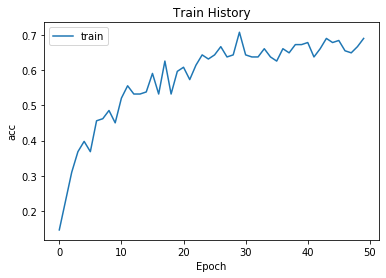

In [34]:
show_train_history(train_history,'acc')

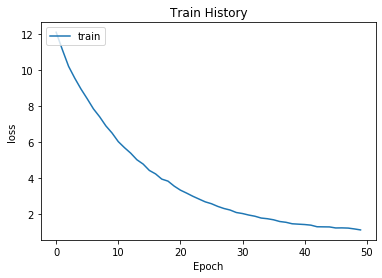

In [35]:
show_train_history(train_history,'loss')

In [36]:
test_out =  model.predict_classes(test_feature)

In [37]:
test_out

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [38]:
prob = model.predict_proba(test_feature)

In [39]:
prob[0:10]

array([[0.3161323 , 0.39019606, 0.16701801, 0.12665358],
       [0.5110715 , 0.33773318, 0.08747625, 0.06371901],
       [0.1668878 , 0.48950145, 0.25283673, 0.09077402],
       [0.49749509, 0.36976844, 0.07132816, 0.06140832],
       [0.1344584 , 0.66120994, 0.09645011, 0.10788152],
       [0.82168996, 0.08809935, 0.05715424, 0.03305638],
       [0.42008317, 0.39072114, 0.10711645, 0.08207925],
       [0.7111529 , 0.1932799 , 0.0302271 , 0.0653402 ],
       [0.3801475 , 0.41005623, 0.1340031 , 0.07579325],
       [0.6060761 , 0.18269902, 0.12475695, 0.08646787]], dtype=float32)

In [40]:
prob[10:16]

array([[0.13812365, 0.6055719 , 0.17938149, 0.07692297],
       [0.33402008, 0.4539766 , 0.16780752, 0.04419572],
       [0.27264425, 0.36725435, 0.21975686, 0.14034458],
       [0.25361466, 0.48513073, 0.15528163, 0.10597294],
       [0.3256831 , 0.4395267 , 0.14309138, 0.09169883],
       [0.22981931, 0.352496  , 0.3457365 , 0.0719482 ]], dtype=float32)

In [41]:
prob[16:]

array([[0.4028789 , 0.2922183 , 0.1876099 , 0.11729289],
       [0.2826474 , 0.3716193 , 0.23092818, 0.11480512],
       [0.35580987, 0.41657612, 0.14178017, 0.08583388],
       [0.29434022, 0.30145276, 0.23307785, 0.17112911]], dtype=float32)

In [42]:
test['HOSDAY'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3])

In [43]:
pd.crosstab( test['HOSDAY'].values, test_out, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,6,4
1,0,6
2,1,2
3,0,1


In [44]:
score2 = model.evaluate(test_feature, test_y, verbose=2)
score2

[1.3364850282669067, 0.6000000238418579]

In [45]:
#model.save('gggood.h5')

In [46]:
#model2 = tf.contrib.keras.models.load_model('ggg.h5')

In [47]:
#scores = model2.evaluate(test_feature, test_y, verbose=2)

In [48]:
#scores

In [49]:
#model3 = tf.contrib.keras.models.load_model('gggood.h5')

In [50]:
#scores3 = model3.evaluate(test_feature, test_y, verbose=2)

In [51]:
#scores3